In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

We chose to work with "Default of Credit Card Clients Dataset," aiming to classify whether a credit card client will default on their payment next month. Given the relevance of credit cards in everyday life, it will be interesting to explore how factors such as available credit, credit payment history, and various demographic factors such as age, education, and marital status may influence the likelihood of defaulting on credit card payments. During the feature engineering process, we intend on exploring intuitive interaction terms such as between age and marital status in attempts to improve predictive ability. 

Random forests are known to be one of the best "out-of-the-bag" models on classification tasks, so it will be interesting to assessing how this model compares to others. 

In [3]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14962.348238,8650.734050,1.0,7498.75,14960.5,22458.25,30000.0
LIMIT_BAL,21000.0,167880.651429,130202.682167,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,21000.0,1.600762,0.489753,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.852143,0.792961,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.554000,0.521675,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.500810,9.212644,21.0,28.00,34.0,41.00,79.0
PAY_0,21000.0,-0.015429,1.120465,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.137095,1.194506,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.171619,1.196123,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.225238,1.168556,-2.0,-1.00,0.0,0.00,8.0


Summary stats descriptions:

1) Amount of Credit Limit (LIMIT_BAL):
- Mean: 167,880.65, Std: 130,202.68
- This statistic indicates that the average credit limit across all clients is approximately 168,000, with a wide variation due to some clients having extremely high credit limits (up to 1 million).

2) Default Payment Rate (default.payment.next.month):
- Mean: 0.223
The default payment rate is 22.3%, where roughly a fifth of the clients defaulted. This shows that the dataset is not highly imbalanced, with the "non-default" class being the majority class but having a ratio 4:1.

In [6]:
train_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
# age_bins = [20,30,40,50,60,70,80]
# names = ['21-30','31-40','41-50','51-60','61-70','71-80']
# train_df['AGE_BIN'] = pd.cut(x=train_df.AGE, bins=age_bins, labels=names, right=True)

# age_cnt = train_df.AGE_BIN.value_counts()
# age_0 = (train_df.AGE_BIN[train_df['default.payment.next.month'] == 0].value_counts())
# age_1 = (train_df.AGE_BIN[train_df['default.payment.next.month'] == 1].value_counts())

In [8]:
# age_dist = pd.DataFrame({'Total': age_cnt, 'No Default': age_0, 'Default': age_1})

# # Calculate percentages
# age_default_counts = train_df.groupby(["AGE_BIN", "default.payment.next.month"]).size().unstack()
# age_default_percentage = age_default_counts.div(age_default_counts.sum(axis=1), axis=0) * 100

# # Plotting the percentage distribution
# plt.figure(figsize=(8, 6))
# sns.barplot(data=age_default_percentage.reset_index().melt(id_vars="AGE_BIN", 
#                                                            value_vars=[0, 1]), 
#             x="AGE_BIN", y="value", hue="default.payment.next.month", 
#             palette="Set2")

# # Labels and title
# plt.xlabel("Age Group")
# plt.ylabel("Percentage (%)")
# plt.title("Percentage of Default Payment by Age Group")
# plt.xticks(rotation=30)

# # Manually set the legend with correct colors
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles=handles, labels=["No", "Yes"], title="Default Payment Next Month")

# # Show plot
# plt.show()

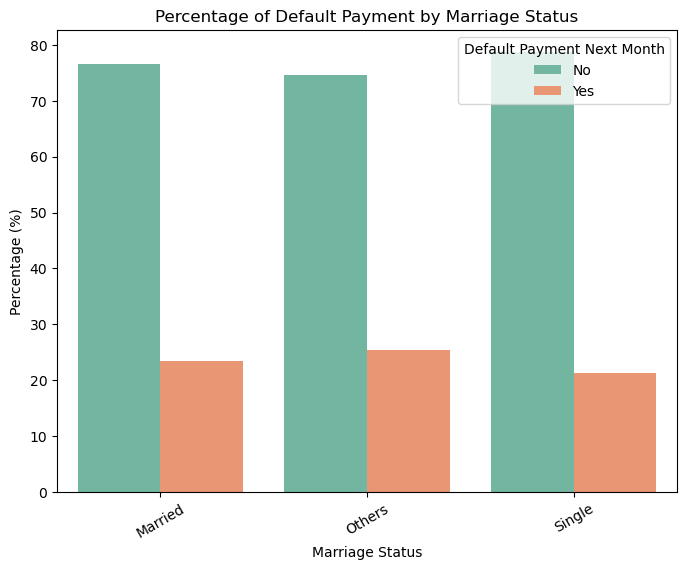

In [9]:
marriage_labels = {
    3: "Others",
    1: "Married",
    2: "Single",
    3: "Others"
}

# Map marriage labels to the dataframe
train_df["MARRIAGE_LABEL"] = train_df["MARRIAGE"].map(marriage_labels)

marriage_default_counts = train_df.groupby(["MARRIAGE_LABEL", "default.payment.next.month"]).size().unstack()
marriage_default_percentage = marriage_default_counts.div(marriage_default_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=marriage_default_percentage.reset_index().melt(id_vars="MARRIAGE_LABEL", 
                                                              value_vars=[0, 1]), 
            x="MARRIAGE_LABEL", y="value", hue="default.payment.next.month", 
            palette="Set2")

plt.xlabel("Marriage Status")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Default Payment by Marriage Status")
plt.xticks(rotation=30)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["No", "Yes"], title="Default Payment Next Month")

plt.show()

train_df = train_df.drop(columns=["MARRIAGE_LABEL"])

Upon analyzing the relationship between marital status and the likelihood of defaulting on a credit card payment, there doesn't appear to be a distinguishable difference in default rates between different marriage statuses (Married, Single, Others). When visualizing the percentage distribution of default payment across the marriage status categories, the proportions of clients who defaulted versus those who did not, are highly similar across the different groups.

Despite this, it’s worth noting that marital status could still play an indirect role when interacting with other variables, such as age, education, or credit limit. These interactions might reveal more nuanced patterns that are not immediately apparent when considering marital status in isolation. Investigating how marital status interacts with demographic and financial variables in the feature engineering stage may still be valuable to explore.

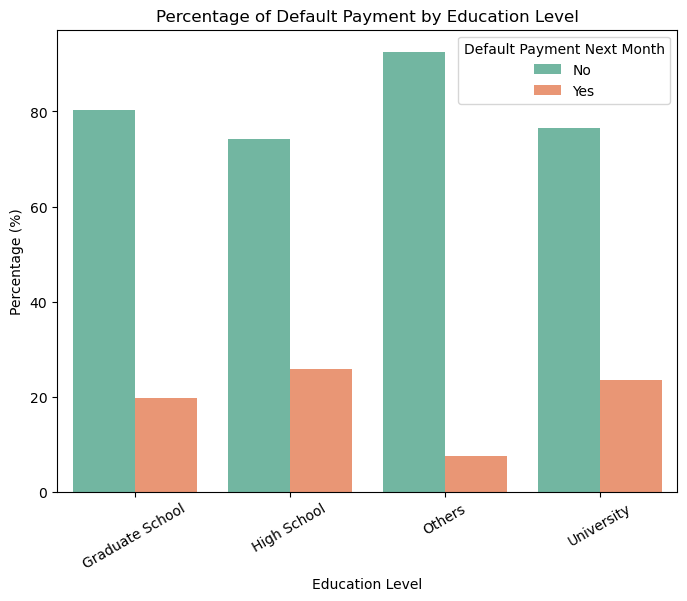

In [24]:
education_labels = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Others",
    5: "Others",
    6: "Others",
    0: "Others"
}

train_df["EDUCATION_LABEL"] = train_df["EDUCATION"].map(education_labels)

education_default_counts = train_df.groupby(["EDUCATION_LABEL", "default.payment.next.month"]).size().unstack()
education_default_percentage = education_default_counts.div(education_default_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=education_default_percentage.reset_index().melt(id_vars="EDUCATION_LABEL", 
                                                              value_vars=[0, 1]), 
            x="EDUCATION_LABEL", y="value", hue="default.payment.next.month", 
            palette="Set2")

plt.xlabel("Education Level")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Default Payment by Education Level")
plt.xticks(rotation=30)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["No", "Yes"], title="Default Payment Next Month")

plt.show()

train_df = train_df.drop(columns=["EDUCATION_LABEL"])

The analysis reveals an association between education level and the likelihood of defaulting on credit card payments. The default rate is highest among high school graduates, followed by university and graduate school graduates, suggesting that lower education levels may be linked to lower financial literacy or fewer economic opportunities, leading to a higher risk of default. 

Interestingly, the "Others" category has the lowest default rate. This suggests that those in the "Others" category may possess skills or experiences that help mitigate the risk of default. For purposes of data transformation, we will therefore encode "Others" as equivalent to a high level of education.

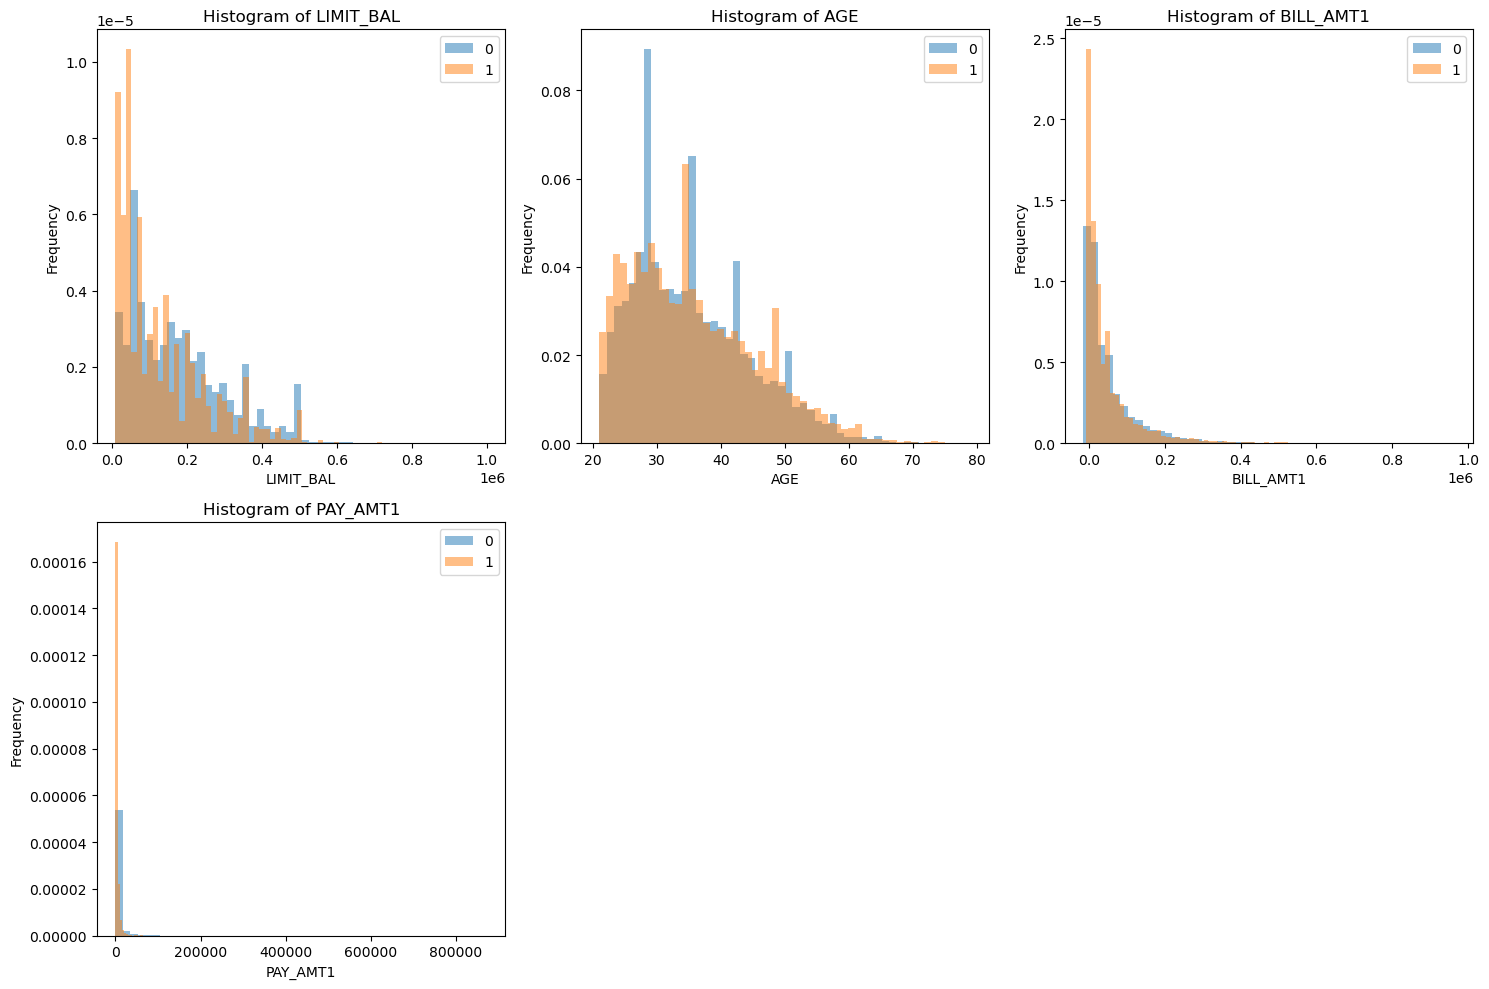

In [11]:
numeric_cols = ['LIMIT_BAL','AGE', 'BILL_AMT1', 'PAY_AMT1']

num_features = len(numeric_cols)
ncols = 3 
nrows = (num_features + ncols - 1) // ncols  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  

for i, feature in enumerate(numeric_cols):
    ax = axes[i]  
    train_df.groupby("default.payment.next.month")[feature].plot.hist(bins=50, alpha=0.5, 
                                                                       legend=True, density=True, 
                                                                       title="Histogram of " + feature,
                                                                       ax=ax)
    ax.set_xlabel(feature)

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

LIMIT_BAL provides some distinction between default and non-default groups. The distribution is right-skewed, with non-defaulting individuals having slightly higher credit limits. This suggests that credit limits may have some predictive power, and higher credit limits may be associated with better creditworthiness and lower default risk.

The other features plotted show considerable overlap, and have little predictive power in isolation.

EDA SUMMARY
- Missing Values: No missing values detected in the dataset.
- Class Imbalance: The dataset exhibits slight class imbalance, with more non-default cases than default cases.
- Numerical Features: Some numerical features have large ranges, requiring scaling for better model performance.
- Evaluation Metrics: Given the class distribution of 4:1, accuracy is a reasonable metric to assess model performance.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [25]:
# Identifying the features and transformations

numeric_features = ['LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
passthrough_features = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
binary_features = ["SEX"]
ordinal_features = ["EDUCATION_CATEGORY"]
categorical_features = ["MARRIAGE"]
drop_features = ["ID", "EDUCATION"]

# label
target = "default.payment.next.month"

In [26]:
X_train, y_train = train_df.drop(columns=[target]), train_df[target]
X_test, y_test = test_df.drop(columns=[target]), test_df[target]

In [27]:
# Define the mapping for education categories
education_mapping = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Others",
    5: "Others",
    6: "Others",
    0: "Others"
}

# Apply the mapping to create the 'education_category' column in both the train and test
train_df['EDUCATION_CATEGORY'] = train_df['EDUCATION'].map(education_mapping)
test_df['EDUCATION_CATEGORY'] = test_df['EDUCATION'].map(education_mapping)

# define ordinal encoding order, Others is treated as a high level education as stated in the EDA analysis
education_order = [
    "High School", "University", "Graduate School", "Others"]

ordinal_transformer = OrdinalEncoder(categories=[education_order], dtype=int)

In [28]:
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)

In [29]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [30]:
numeric_transformer = StandardScaler()

In [32]:
preprocessor = make_column_transformer(
    (
        numeric_transformer,
        numeric_features,
    ),  
    (
        ordinal_transformer,
        ordinal_features,
    ),  
    (
        binary_transformer,
        binary_features,
    ),  
    (
        categorical_transformer,
        categorical_features,
    ), 
    ("drop", drop_features), 
    ("passthrough", passthrough_features)
)

In [33]:
# Fit and transform the preprocessor on the training data
preprocessor.fit(X_train)
transformed_df = preprocessor.transform(X_train)

# Access the OneHotEncoder used for categorical features
categorical_transformer = preprocessor.transformers_[3][1]  # Adjust according to your pipeline

# Get the feature names from the OneHotEncoder for categorical features
categorical_column_names = categorical_transformer.get_feature_names_out(categorical_features).tolist()

column_names = (
    numeric_features
    + ordinal_features
    + binary_features    
    + categorical_column_names
)

column_names += passthrough_features

transformed_df = pd.DataFrame(transformed_df, columns=column_names)

transformed_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1.168355,0.054187,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.090017,-0.597108,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,...,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
2,-0.060527,0.922579,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,...,0.0,1.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,-0.367748,-0.597108,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.905384,2.008070,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [51]:
results_dict = {}

In [52]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [53]:
dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)

results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.034 (+/- 0.015),0.009 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [54]:
pipe_lr = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=200, random_state=123),
)

# Hyperparameter tuning of complexity hyperparameter
param_grid = {

    "logisticregression__C": 10.0 ** np.arange(-2, 2, 0.5),
}

grid_search = GridSearchCV(pipe_lr, 
                  param_grid = param_grid,
                  n_jobs=-1, 
                 )

grid_search.fit(X_train, y_train)
best_C =  grid_search.best_params_['logisticregression__C']

print("best_C: ", best_C)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [43]:
# Retrain Logistic Regression with the best 'C'
best_lr = LogisticRegression(C=best_C, max_iter=200, random_state=123)
pipe_best_lr = make_pipeline(preprocessor, best_lr)

# report cross validation scores along with standard deviation
results_dict["logistic_regression"] = mean_std_cross_val_scores(
    pipe_best_lr, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.031 (+/- 0.011),0.011 (+/- 0.002),0.777 (+/- 0.000),0.777 (+/- 0.000)
logistic_regression,0.134 (+/- 0.059),0.010 (+/- 0.001),0.810 (+/- 0.003),0.811 (+/- 0.001)


LINEAR MODEL SUMMARY:
Through exhaustive hyperparameter tuning using GridSearchCV, the optimal complexity parameter (C) for the Logistic Regression model was found to be 3.162.
Upon retraining the model with this value of C, the test score achieved was 0.810 (+/- 0.003), while the training score was 0.811 (+/- 0.001).
The close alignment between the cross-validation training and test scores suggests that the model is likely to generalize well to unseen data, indicating a good balance between bias and variance.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [55]:
models = {
    "RandomForest": RandomForestClassifier(),
    "kNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DecisionTree": DecisionTreeClassifier()
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model) 
    cv_results = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True)
  
    results_dict[name] = cv_results

results_df = pd.DataFrame(results_dict).T
print(results_df)

                        fit_time         score_time         test_score  \
dummy          0.034 (+/- 0.015)  0.009 (+/- 0.000)  0.777 (+/- 0.000)   
RandomForest   7.857 (+/- 0.323)  0.131 (+/- 0.019)  0.815 (+/- 0.005)   
kNN            0.243 (+/- 0.450)  0.267 (+/- 0.095)  0.794 (+/- 0.004)   
SVC           19.998 (+/- 1.093)  5.995 (+/- 0.197)  0.819 (+/- 0.004)   
DecisionTree   0.652 (+/- 0.023)  0.011 (+/- 0.001)  0.724 (+/- 0.012)   

                    train_score  
dummy         0.777 (+/- 0.000)  
RandomForest  0.999 (+/- 0.000)  
kNN           0.843 (+/- 0.002)  
SVC           0.825 (+/- 0.001)  
DecisionTree  0.999 (+/- 0.000)  


The SVC model, a linear model, achieved the highest test score of 0.819 (+/- 0.004) and did not exhibit overfitting, as the train_score was similar at 0.825 (+/- 0.001).

Performance: Both the Random Forest and Decision Tree models exhibited overfitting, with train_scores close to 1.0 and much higher training performance compared to testing performance. Additionally, they did not outperform the linear model, as the Decision Tree had a lower test score (0.724) compared to both Logistic Regression (0.810) and SVC. The Random Forest did have a slightly higher test score than Logistic Regression; however, this difference is not statistically significant, as the Logistic Regression score falls within one standard deviation of the Random Forest test score. 

Fit and score times: SVC model had the slowest fit and score times, followed by the Random Forest model. kNN scored slightly lower in test, 0.794 (+/- 0.004), than the linear models, but was the most time efficient model. If computation time is a large concern, it strikes a good balance between efficiency and accuracy.

The results suggest that linear models have the highest test scores.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)